In [2]:
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

## a) Comprueba la normalidad a una muestra obtenida mediante el muestreo aleatorio de una distribución normal con media μ = 0.05 y desviación típica σ = 0.9 y n = 1000.

### Como el tamaño de muestra no es muy grande, se puede emplear la Prueba de Shapiro-Wilk. En Python, se realiza utilizando la función shapiro de la librería scipy.stats. La muestra se obtiene con la función np.random.normal, la cual se vió en el tema 1.

In [3]:
np.random.seed(seed = 11)

In [4]:
mu, sigma = 0.05, 0.9
muestra = np.random.normal(mu, sigma, 1000)

In [5]:
sh_result = stats.shapiro(muestra)
print("estadístico: %5.3f, p.valor: %5.3f" %(sh_result.statistic,
sh_result.pvalue))

estadístico: 0.999, p.valor: 0.702


### El resultado sale mayor que 0.05 y por lo tanto se acepta la hipotesis nula de normalidad de la muestra.

## b) Comprueba la normalidad a una muestra obtenida mediante el muestreo aleatorio de una distribución normal con media μ = 0.05 y desviación típica σ = 0.9 y n = 10000.

### Como el tamaño de muestra es mayor que 5000, la Prueba de Shapiro-Wilk no es tan recomendable. En cambio, se puede realizar las pruebas de normalidad en Python utilizando la función kstest de la librería scipy.stats. La muestra se obtiene con la función np.random.normal, la cual se vió en el tema 1. La Prueba de Kolmogorov-Smirnov realmente necesita comparar entre dos distribuciones. Así pues, se compara la muestra con la distribución normal pasando como argumentos la media y la desviación típica.

In [6]:
np.random.seed(seed = 11)

In [7]:
mu, sigma = 0.05, 0.9
muestra_2 = np.random.normal(mu, sigma, 10000)

In [8]:
ks_result = stats.kstest(muestra, "norm", args = (mu,sigma))
print("estadístico: %5.3f, p.valor: %5.3f" %(ks_result.statistic,
ks_result.pvalue))

estadístico: 0.016, p.valor: 0.962


### Como el p-valor de la Prueba de Shapiro-Wilk es mucho mayor de 0.05 se considera que la distribución cumple la normalidad de manera estadísticamente significativa.

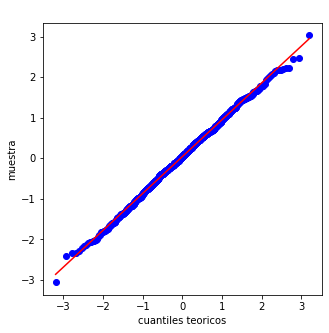

In [9]:
fig = plt.figure(figsize=(5,5))
qqplot = stats.probplot(muestra, dist = "norm", plot = plt)
plt.xlabel("cuantiles teoricos")
plt.ylabel("muestra")
plt.title(" ")
plt.show()